<a href="https://colab.research.google.com/github/sumeyrasyn/EvaluatingGoodnessofFit/blob/main/reg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Problem Description

The data is about the costs charged by the insurance companies to individuals. These are costs that the insured individuals were required to pay after the insurance company made payments to medical providers. The dataset includes six variables as described below:

**age:** The age of the individual. It's a numeric.

**sex:** The biological sex of the insured. It is categorical (male or female).

**bmi:** Body mass index. This index indicates whether an individual's weight is relatively high or low, based on height. This index defines an ideal range between 18.5 and 24.9. The variable is continuous.

**children:** How many dependent children the insured person has. Dependents are covered by the insurance plan. This is a numeric variable.

**smoker:** This categorical variable (yes | no) indicates or not the person smokes.

region: The person's residential area in the US. It's a categorical variable (northeast, southeast, southwest, northwest).

charges: The medical costs (in US dollars) billed by the insurance company. It's a continuous variable.

In the examples, our target variable will be the "charges" billed by the insurance company. Since, it's a continuous variable, we're dealing with a regression task.


# Exploratory Data Analysis and Visualization

In [240]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm


%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

file_path = "https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/insurance.csv"
df = pd.read_csv(file_path)

df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.552
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.471
4,32,male,28.880,0,no,northwest,3866.855
5,31,female,25.740,0,no,southeast,3756.622
6,46,female,33.440,1,no,southeast,8240.590
7,37,female,27.740,3,no,northwest,7281.506
8,37,male,29.830,2,no,northeast,6406.411
9,60,female,25.840,0,no,northwest,28923.137


In [241]:
df.shape

(1338, 7)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [243]:
df.describe()

,age,bmi,children,charges
count,1338.000,1338.000,1338.000,1338.000
mean,39.207,30.663,1.095,13270.422
std,14.050,6.098,1.205,12110.011
min,18.000,15.960,0.000,1121.874
25%,27.000,26.296,0.000,4740.287
50%,39.000,30.400,1.000,9382.033
75%,51.000,34.694,2.000,16639.913
max,64.000,53.130,5.000,63770.428


**Missing Value Control**

In [244]:
df.isnull().sum()/len(df)*100  


age        0.000
sex        0.000
bmi        0.000
children   0.000
smoker     0.000
region     0.000
charges    0.000
dtype: float64

In [245]:
df.nunique()


age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [246]:
for column_name in df.columns:
    print("{} unique values in column : {}".format(column_name,df[column_name].unique()[0:10]))
    print("-" * 30)

age unique values in column : [19 18 28 33 32 31 46 37 60 25]
------------------------------
sex unique values in column : ['female' 'male']
------------------------------
bmi unique values in column : [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84 ]
------------------------------
children unique values in column : [0 1 3 2 5 4]
------------------------------
smoker unique values in column : ['yes' 'no']
------------------------------
region unique values in column : ['southwest' 'southeast' 'northwest' 'northeast']
------------------------------
charges unique values in column : [16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692]
------------------------------


In [247]:
numerical_features = df.select_dtypes([int, float]).columns
numerical_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [248]:
categorical_features = df.select_dtypes([object]).columns
categorical_features

Index(['sex', 'smoker', 'region'], dtype='object')

**Outliers Control**

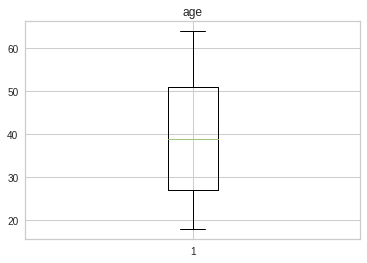

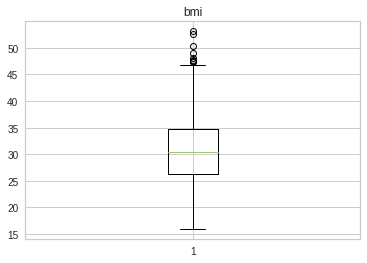

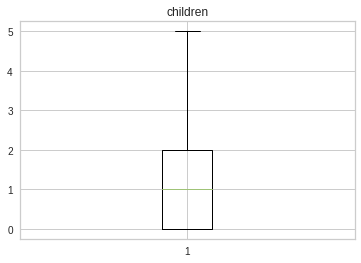

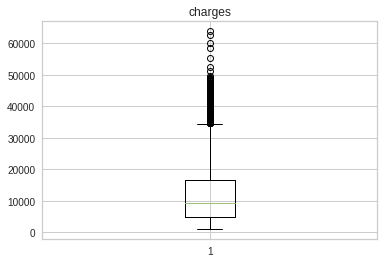

In [249]:
for col in numerical_features:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()
# bmi ve charges değişkenlerinde outliers vardır.


bmi and charges have outliers


In [250]:
def outlier_zscore(df):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3.5
    mean = np.mean(df)
    std = np.std(df)
    for i in df:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    print(outliers)
    return len(outliers), outliers

In [251]:
bmi_outliers_number, bmi_outliers = outlier_zscore(df.bmi)
print(f"The number of outliers are {bmi_outliers_number} and the outliers are {bmi_outliers}")

[52.58, 53.13]
The number of outliers are 2 and the outliers are [52.58, 53.13]


In [252]:
charges_outliers_number, charges_outliers = outlier_zscore(df.charges)
print(f"The number of outliers are {charges_outliers_number} and the outliers are {charges_outliers}")

[63770.42801, 58571.074479999996, 60021.39897, 62592.87309]
The number of outliers are 4 and the outliers are [63770.42801, 58571.074479999996, 60021.39897, 62592.87309]


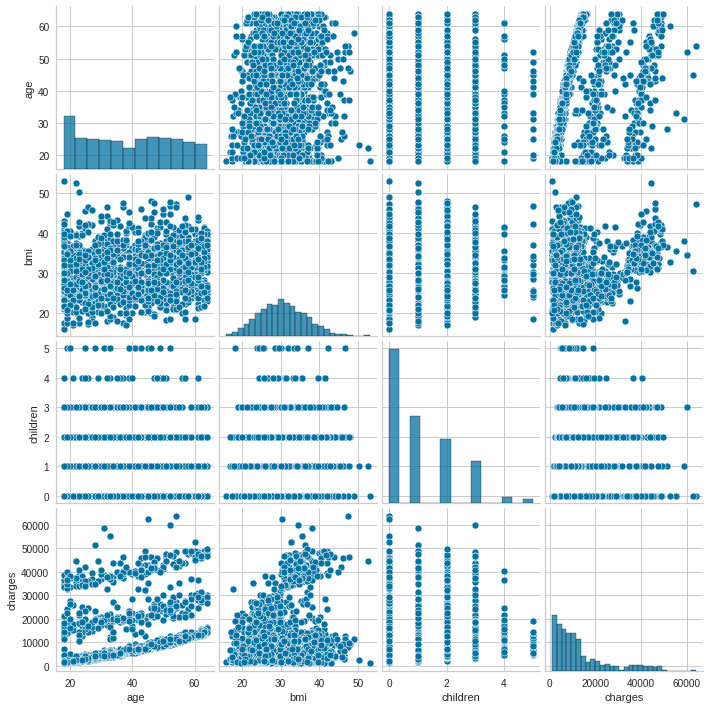

In [253]:
ax=sns.pairplot(df[numerical_features])
plt.show()

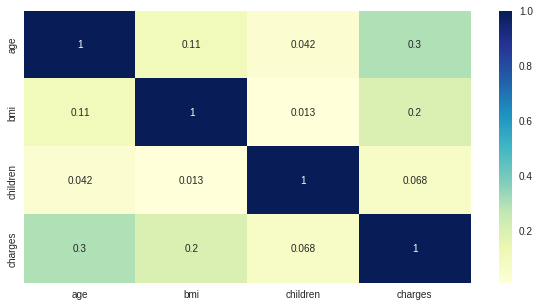

In [254]:
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

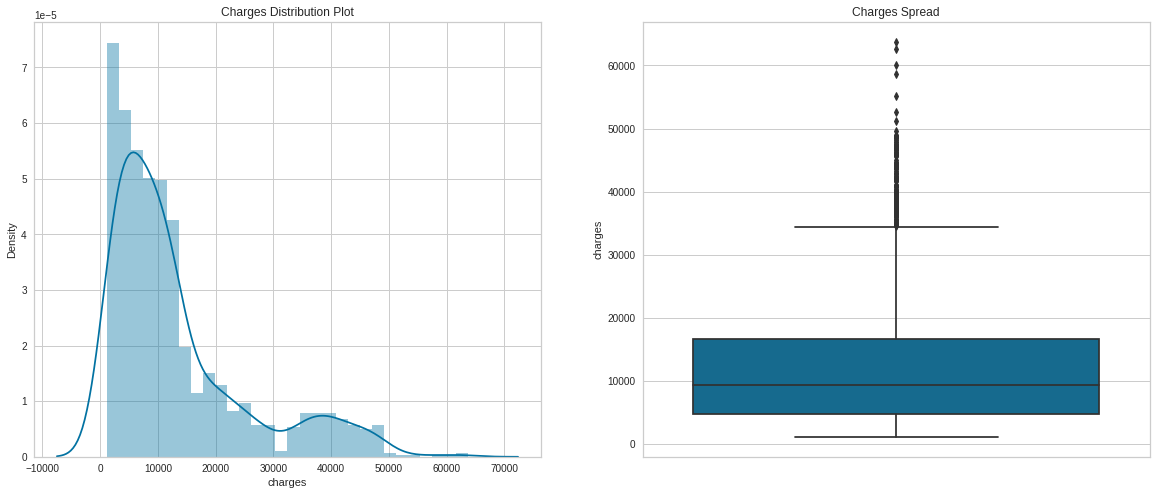

In [255]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Charges Distribution Plot')
sns.distplot(df.charges)

plt.subplot(1,2,2)
plt.title('Charges Spread')
sns.boxplot(y=df.charges)

plt.show()

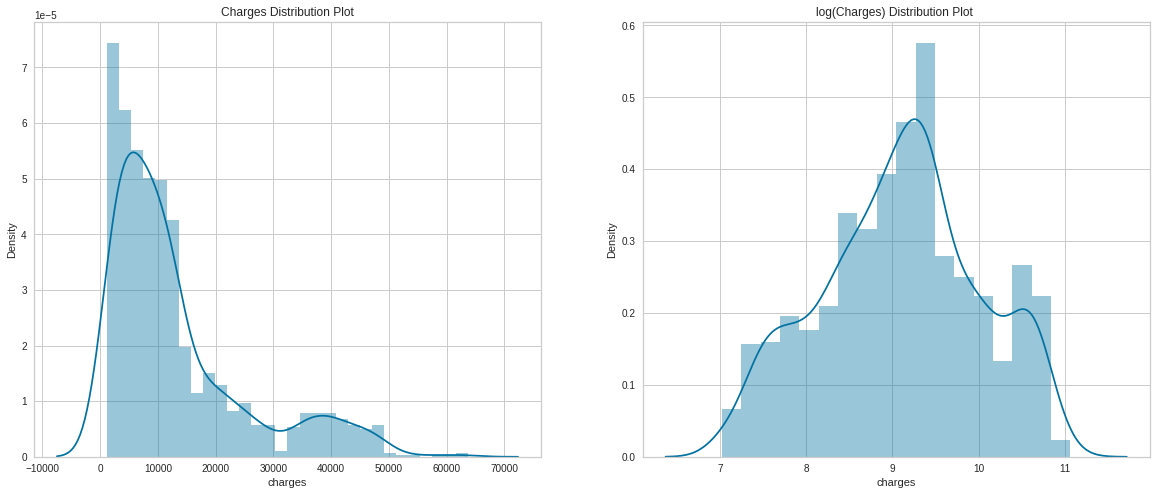

In [256]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Charges Distribution Plot')
sns.distplot(df.charges)

plt.subplot(1,2,2)
plt.title('log(Charges) Distribution Plot ')
sns.distplot(np.log(df.charges))
plt.show()



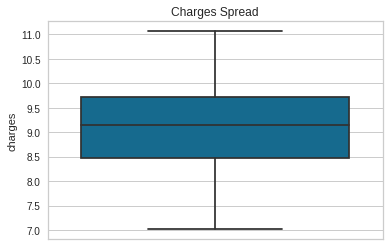

In [257]:
plt.title('Charges Spread')
sns.boxplot(y=np.log(df.charges))

plt.show()


Thanks to the logarithm transformation, no outliers are seen in the charges variable

In [258]:
df['log_charges'] = np.log(df['charges'])

In [259]:
df["is_male"] = pd.get_dummies(df.sex, drop_first=True)
df["is_smoker"] = pd.get_dummies(df.smoker, drop_first=True)
df.head(10)
#New columns have been added to the data set according to smoking and gender with the get dumnies method.

,age,sex,bmi,children,smoker,region,charges,log_charges,is_male,is_smoker
0,19,female,27.900,0,yes,southwest,16884.924,9.734,0,1
1,18,male,33.770,1,no,southeast,1725.552,7.453,1,0
2,28,male,33.000,3,no,southeast,4449.462,8.401,1,0
3,33,male,22.705,0,no,northwest,21984.471,9.998,1,0
4,32,male,28.880,0,no,northwest,3866.855,8.260,1,0
5,31,female,25.740,0,no,southeast,3756.622,8.231,0,0
6,46,female,33.440,1,no,southeast,8240.590,9.017,0,0
7,37,female,27.740,3,no,northwest,7281.506,8.893,0,0
8,37,male,29.830,2,no,northeast,6406.411,8.765,1,0
9,60,female,25.840,0,no,northwest,28923.137,10.272,0,0


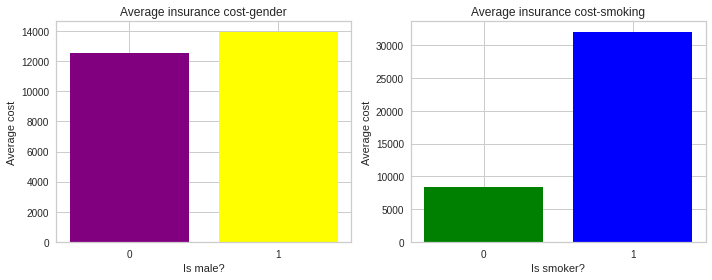

In [260]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.bar(df.groupby("is_male")["charges"].mean().index, df.groupby("is_male")["charges"].mean(),
       color=("purple","yellow"))
plt.title("Average insurance cost-gender")
plt.ylabel("Average cost")
plt.xlabel("Is male?")
plt.xticks([0,1])

plt.subplot(1,2,2)
plt.bar(df.groupby("is_smoker")["charges"].mean().index, df.groupby("is_smoker")["charges"].mean(),
       color=("green","blue"))
plt.title("Average insurance cost-smoking")
plt.ylabel("Average cost")
plt.xlabel("Is smoker?")
plt.xticks([0,1])

plt.tight_layout()
plt.show()

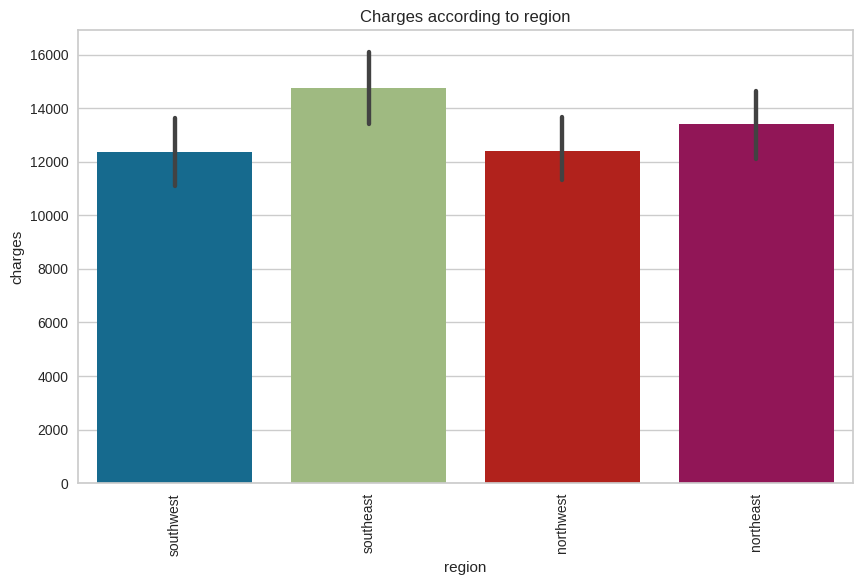

In [261]:
plt.figure(figsize=(10,6), dpi = 100)

sns.barplot(x = 'region', y = 'charges', data = df)
plt.xticks(rotation = 90)
plt.title("Charges according to region")

plt.show()

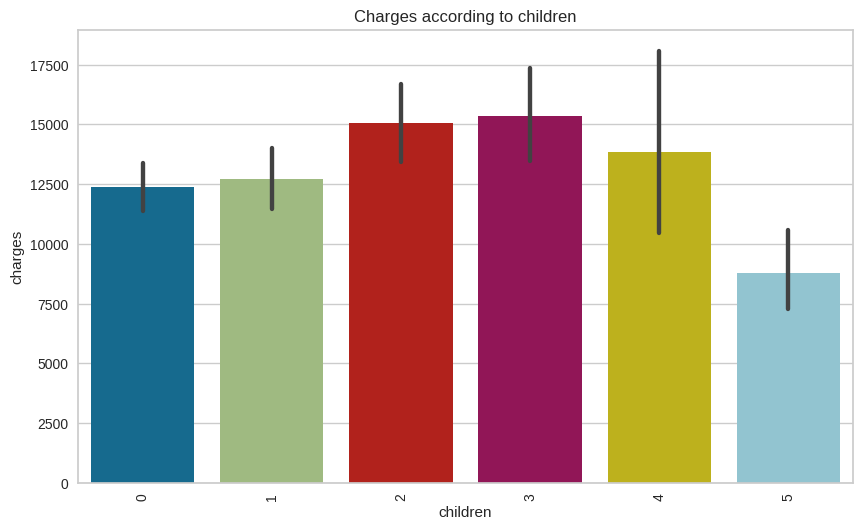

In [262]:
plt.figure(figsize=(10,6), dpi = 100)

sns.barplot(x = 'children', y = 'charges', data = df)
plt.xticks(rotation = 90)
plt.title("Charges according to children")

plt.show()

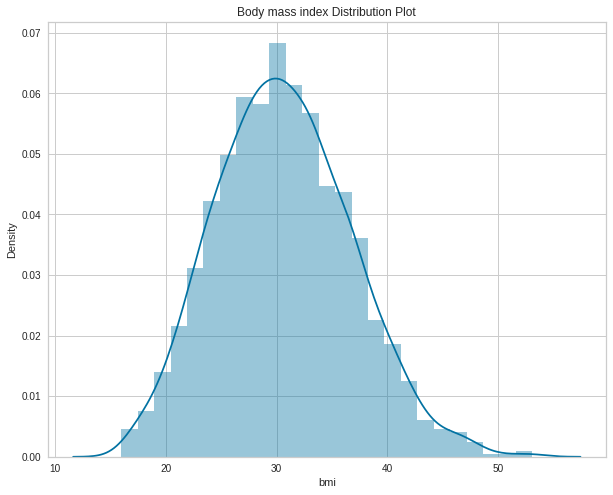

In [263]:
plt.figure(figsize=(10,8))

plt.title('Body mass index Distribution Plot')
sns.distplot(df.bmi)

In [264]:
df = pd.get_dummies(df, columns = ['region'],drop_first=True)
df.head()

,age,sex,bmi,children,smoker,charges,log_charges,is_male,is_smoker,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.924,9.734,0,1,0,0,1
1,18,male,33.770,1,no,1725.552,7.453,1,0,0,1,0
2,28,male,33.000,3,no,4449.462,8.401,1,0,0,1,0
3,33,male,22.705,0,no,21984.471,9.998,1,0,1,0,0
4,32,male,28.880,0,no,3866.855,8.260,1,0,1,0,0


In [265]:
df = pd.get_dummies(df, columns = ['children'],drop_first=True)
df.head()

,age,sex,bmi,smoker,charges,log_charges,is_male,is_smoker,region_northwest,region_southeast,region_southwest,children_1,children_2,children_3,children_4,children_5
0,19,female,27.900,yes,16884.924,9.734,0,1,0,0,1,0,0,0,0,0
1,18,male,33.770,no,1725.552,7.453,1,0,0,1,0,1,0,0,0,0
2,28,male,33.000,no,4449.462,8.401,1,0,0,1,0,0,0,1,0,0
3,33,male,22.705,no,21984.471,9.998,1,0,1,0,0,0,0,0,0,0
4,32,male,28.880,no,3866.855,8.260,1,0,1,0,0,0,0,0,0,0


# Best Model Sellection

In [266]:
from sklearn.model_selection import train_test_split
y = df['log_charges']
X = df[["age","is_male","is_smoker","bmi",	"region_northwest", "region_southeast",	"region_southwest","children_1","children_2",
        "children_3"	,"children_4",	"children_5"]]

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [267]:
from sklearn.ensemble import RandomForestRegressor
rastgele_orman = RandomForestRegressor(n_estimators=25, random_state=10)
rastgele_orman.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=10)

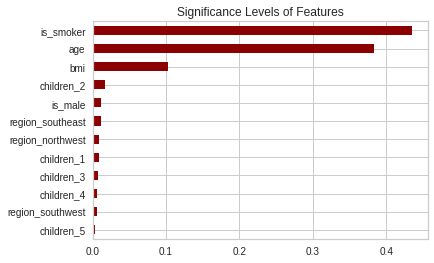

In [268]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_train.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkred')
plt.title('Significance Levels of Features')
plt.show()

I decided to set up my model using the algorithm with bmi, age, is_smoker variables.

# Building Model

**Test Section**

In [269]:
import scipy.stats as stats
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(df[df.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(df[df.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


In [270]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(df[df.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(df[df.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [271]:
# Y is the target variable
Y = df['charges']
# X is the feature set which includes:
X = df[['is_smoker','age','bmi']]


# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [23823.68449531   259.54749155   322.61513282]

Intercept: 
 -11676.830425187785


In [272]:
X = sm.add_constant(X)

lr1 = sm.OLS(Y, X).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:34:14   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
is_smoker   2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
age          259.5475     11.934     21.748      0.000     236.136     282.959
bmi          322.6151     27.487     11.737      0.000     268.692     376.538
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
# Y is the target variable
Y = df['charges']

# This is the interaction between bmi and smoking
df["bmi_is_smoker"] = df.bmi * df.is_smoker

# X is the feature set
X = df[['age',"is_smoker" ,"bmi", "bmi_is_smoker",]]

lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 2.66758240e+02 -2.00935084e+04  7.10929845e+00  1.43092041e+03]

Intercept: 
 -2290.008005638985


In [274]:
X = sm.add_constant(X)

lr2 = sm.OLS(Y, X).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     1702.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:34:14   Log-Likelihood:                -13267.
No. Observations:                1338   AIC:                         2.654e+04
Df Residuals:                    1333   BIC:                         2.657e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2290.0080    831.999     -2.752      0.006   -3922.179    -657.837
age             266.7582      9.617     27.739      0.000     247.893     285.624
is_smoker     -2.009e+04   1666.827    -12.055      0.000   -2.34e+04   -1.68e+04
bmi               7.1093     25.058      0.284      0.777     -42.049      56.267
bmi_is_smoker  1430.9204     53.217     26.888      0.000    1326.522    1535.319
==============================================================================
Omnibus:                      708.403   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4237.479
Skew:                           2.485   Prob(JB):                         0.00
Kurtosis:                      10.162   Cond. No.                         660.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

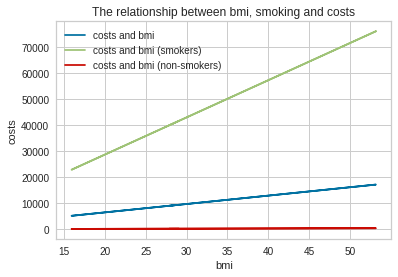

In [275]:
costs_bmi = df.bmi * 322.6151
costs_bmi_smokers = df.bmi * 1430.9204
costs_bmi_non_smokers = df.bmi * 7.1093


plt.plot(df.bmi, costs_bmi)
plt.plot(df.bmi, costs_bmi_smokers)
plt.plot(df.bmi, costs_bmi_non_smokers)
plt.legend(["costs and bmi", "costs and bmi (smokers)", "costs and bmi (non-smokers)"])
plt.xlabel("bmi")
plt.ylabel("costs")
plt.title("The relationship between bmi, smoking and costs")

plt.show()

The blue line is the relationship we estimated in  between bmi and charges.  The red line is the relationship we estimated in between the charges and bmi for non-smokers and the green line represents the relationship between charges and bmi for smokers. As we see, the increase in charges with an increase in bmi is higher for smokers than non-smokers. 

# My Model

In [276]:
# Y is the target variable
Y = df['charges']

# This is the interaction between bmi and smoking
df["bmi_is_smoker"] = df.bmi * df.is_smoker

# X is the feature set
X = df[[ 'age',"is_male" ,"bmi_is_smoker"]]

lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 271.00492243 -292.32270338  811.03144798]

Intercept: 
 -2307.4170099489784


In [277]:
X = sm.add_constant(X)

lr3 = sm.OLS(Y, X).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1938.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:34:15   Log-Likelihood:                -13355.
No. Observations:                1338   AIC:                         2.672e+04
Df Residuals:                    1334   BIC:                         2.674e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2307.4170    455.995     -5.060      0.000   -3201.962   -1412.872
age             271.0049     10.199     26.571      0.000     250.997     291.013
is_male        -292.3227    287.602     -1.016      0.310    -856.524     271.879
bmi_is_smoker   811.0314     11.307     71.729      0.000     788.850     833.213
==============================================================================
Omnibus:                      545.584   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2447.115
Skew:                           1.914   Prob(JB):                         0.00
Kurtosis:                       8.407   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

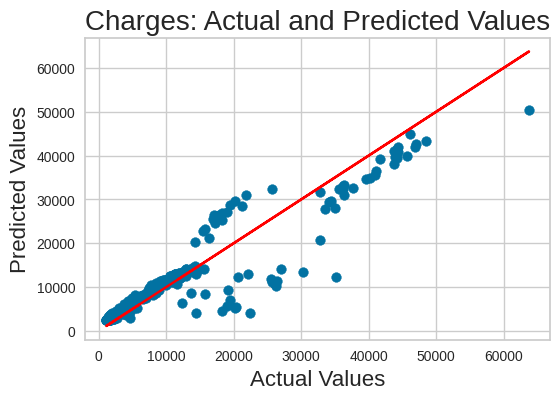

Mean absolute error of the prediction is: 3003.019152729817
Mean squared error of the prediction is: 23439382.464481402
Root mean squared error of the prediction is: 4841.423598951181
Mean absolute percentage error of the prediction is: 30.953014366786668


In [278]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
X = df[[ 'age',"is_male","bmi_is_smoker"]]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

lrm = linear_model.LinearRegression()

lrm.fit(X_train, y_train)

score = lrm.score(X_test, y_test)

y_preds = lrm.predict(X_test)

plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Values", fontsize=16)
plt.ylabel("Predicted Values", fontsize=16)
plt.title("Charges: Actual and Predicted Values", fontsize=20 )
plt.show()


print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

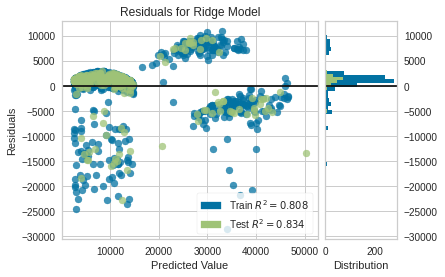

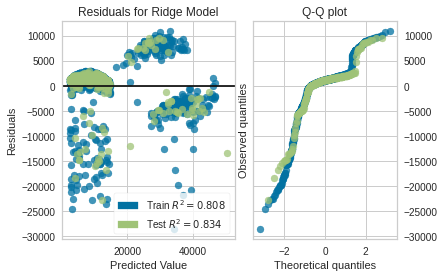

In [279]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure



visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

When we look at the QQ graph, it is seen that the normality assumption is not provide. That's why we need to apply logarithm transformation to the target variable . We will continue the model with  logarithm Y.

# My Model with (log_charges)

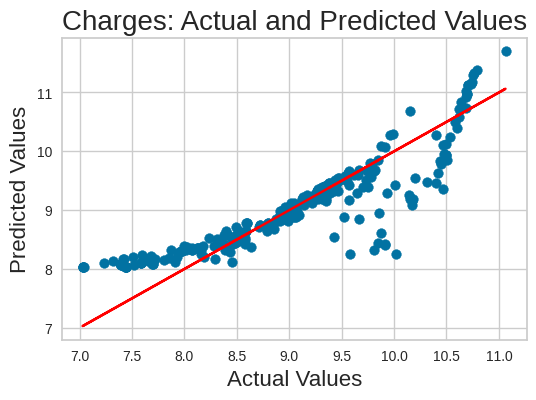

Mean absolute error of the prediction is: 0.28809509551717266
Mean squared error of the prediction is: 0.19380233127378962
Root mean squared error of the prediction is: 0.4402298618605849
Mean absolute percentage error of the prediction is: 3.256237850706977


In [280]:
from sklearn.model_selection import train_test_split

y=df["log_charges"]
X = df[[ "is_male",'age' ,"bmi_is_smoker"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

lrm = linear_model.LinearRegression()

lrm.fit(X_train, y_train)

score = lrm.score(X_test, y_test)

y_preds = lrm.predict(X_test)


plt.figure(dpi = 100)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Values", fontsize=16)
plt.ylabel("Predicted Values", fontsize=16)
plt.title("Charges: Actual and Predicted Values", fontsize=20 )
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



In [281]:
X = sm.add_constant(X)

lrm= sm.OLS(y, X).fit()

lrm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     1413.
Date:                Tue, 18 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:34:17   Log-Likelihood:                -829.34
No. Observations:                1338   AIC:                             1667.
Df Residuals:                    1334   BIC:                             1687.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.4390      0.039    189.716      0.000       7.362       7.516
is_male          -0.0831      0.025     -3.361      0.001      -0.132      -0.035
age               0.0353      0.001     40.274      0.000       0.034       0.037
bmi_is_smoker     0.0504      0.001     51.811      0.000       0.048       0.052
==============================================================================
Omnibus:                      409.729   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.037
Skew:                           1.486   Prob(JB):                    2.16e-305
Kurtosis:                       7.041   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assumption: Multicollinearity**

In [292]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df[['age',"is_male","bmi_is_smoker"]]
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

         feature   VIF
0            age 1.000
1        is_male 1.160
2  bmi_is_smoker 1.160


There is no high correlation between features.

**Assumption: the error term should be zero on average**

In [283]:
errors = y_test -y_preds

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -0.01503139851018158


The average of the model's error is effectively zero.

**Assumption: Normality**

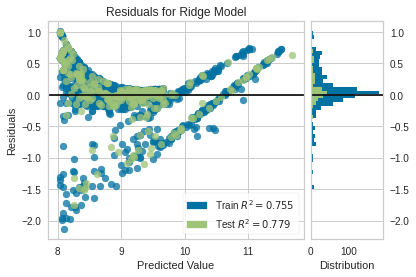

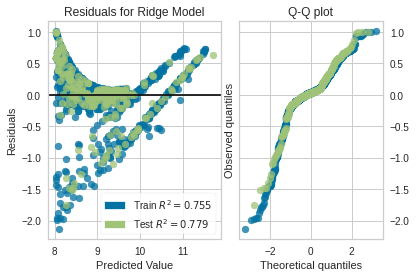

In [284]:
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure



visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

We see that the normality assumption is better thanks to the logarithm transformation.

In [293]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 126.9763291546955 and p value is 0.0
Normality test statistics is 58.63816507290632 and p value is 1.8487757669969203e-13


As can be seen in the charts above, our errors are not normally distributed. If they were, we would see a straight line going from the bottom-left to the upper-right of the QQ plot and a regular bell curve like shape in the histogram. While visualizations give us a first impression about normality, the best way to learn about this is to apply formal statistical tests. To this end, we use two of them from scipy's stats module: Jarque Bera test and normal test. The null hypothesis of the both tests state that the errors are normally distributed.
The p-values of both tests indicate that our errors are not normally distributed.

**Assumption: Linearity**

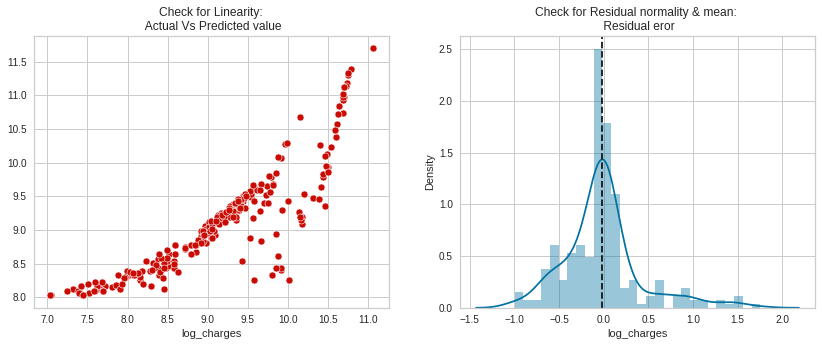

In [285]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_preds,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_preds),ax=ax,color='b')
ax.axvline((y_test - y_preds).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

**Assumption: homoscedasticity**

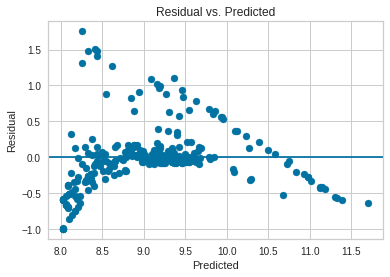

In [286]:
plt.scatter(y_preds, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

Here we demonstrate the two of them: Bartlett and the Levene tests. The null hypothesis for both tests is that the errors are homoscedastic. Both tests can be imported from scipy's stats module.

In [287]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(y_preds, errors)
lev_stats = levene(y_preds, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 79.3046 and p value is 5.32e-19
Levene test statistic value is 72.9739 and p value is 1.38e-16


**H0 (Null Hypothesis):** Homoscedasticity is present (the residuals are distributed with equal variance)

**HA (Alternative Hypothesis):** Heteroscedasticity is present (the residuals are not distributed with equal variance)

The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

There may be several causes of heteroscedasticity. Examples include, outliers in the data and omitted variables that are important in explaining the variance of the target variable. So, dealing with the outliers and including relevant variables help to fix the heteroscedasticity problem. Some fixes to heteroscedasticity include transforming the dependent variable (see Box Cox transformation and log transformation) and adding features that target the poorly-estimated areas

**Assumption: error terms should be uncorrelated with one other**

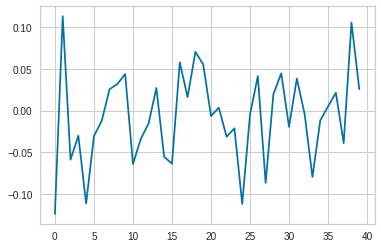

In [288]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of our medical costs model is indeed very low (ranging between -0.06 and 0.05).

# Comparison of Actual Values ​​and Predicted Values

In [290]:
df_linearRegression = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
df_linearRegression.head()

,Actual,Predicted
44,8.713,8.716
134,7.807,8.158
980,10.147,9.265
618,10.447,9.781
1238,8.852,8.682


# Final Conclusion





* All features in the dataset are examined and visualized.

* Outliers were observed in bmi and charges variables and their numbers were determined. Log transformation was applied for our dependent variable(charges), and the outliers problem was solved. Bmi variable has only 2 outliers, so it was decided that it had no effect on the model and continued in this way.
*   The best model selection method was applied and the importance levels of the features were determined for the model and the model was started with these features.
* One more variable added to the model for creating interaction.(bmi_is_smoker)

* Checked whether the model meets the assumptions.

  It has been shown that the model named My model does not provide a mormality assumption with the help of the QQ plot. Therefore, the dependent variable logarithm transformation is applied.It continued with the model named My Model with (log_charges).
*  Data set splitted into test and train as %20 and %80.

* The model does not satisfy linearity and homoscedasticity assumptions because the normality problem is not fully resolved. Other assumptions seem fine.
* While checking the assumptions, both tests and necessary graphics were used.
* No high correlation was found between features.
* The performance of the model was measured and this was supported by visuals.
R-squared:	0.761 and Adj. R-squared:	0.760









# Interpretation of The Resulting Coefficients

All interpretations made over latest model, My model with (log_charges).


*   The t-statistic evaluates whether or not there is significant association between the predictor and the outcome variable. All predictors are significant p<0.05
*  Besides “is_male”, all predictors have positive effect on the charges.
* The interaction between body mass index and smoking status was a good predictor for charges and it has the highest coefficient.
*  All of these effects are significant.




